###  Libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_kernels
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tslearn.clustering import KernelKMeans as TSKernelKMeans
from KernelKMeans import KernelKMeans
from GlobalKernelKMeans import GlobalKernelKMeans
from Rings import Rings
from Common_Modules.Evaluation import Evaluator

C:\Users\APDHP-DM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


### Global Variables

In [2]:
seed = 42
evaluator = Evaluator()

### Load Dataset

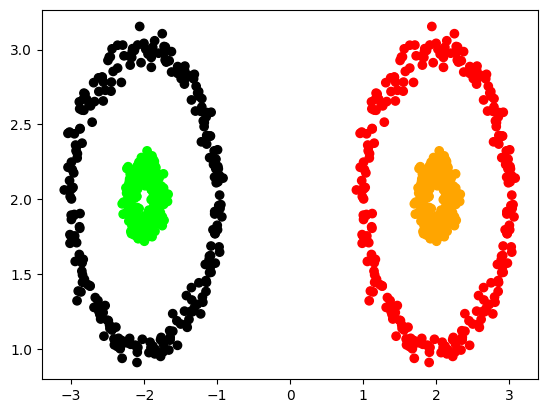

In [3]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'black', 'cyan', 'gray', 'lime']

# Generate 5 pairs of data with specified center positions and unique IDs for each ring
centers_coordinates = [(2, 2), (-2, 2)]  # Specify center positions for each pair

rings = Rings()

X, y = rings.make_rings_pairs(centers_coordinates=centers_coordinates, n_samples=500, factor=0.2, noise=0.05)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(colors))

In [4]:
K = 4
kernel_matrix = pairwise_kernels(X, X, metric='rbf', gamma=3)

### kMeans

C:\Users\APDHP-DM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ACC: 0.70 PUR: 0.70 NMI: 0.63 ARI: 0.49


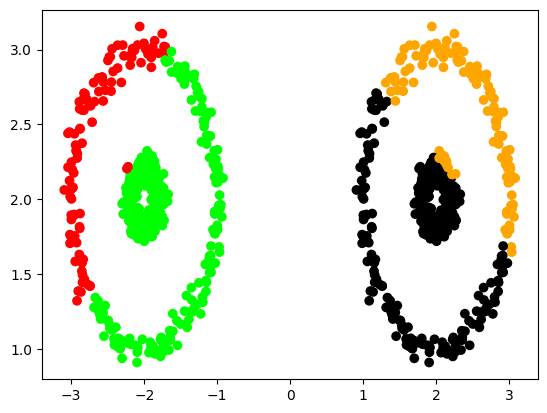

In [5]:
kmeans = KMeans(n_clusters=K).fit(X)
acc, pur, nmi, ari = evaluator.evaluate_model(y, kmeans.labels_)
evaluator.print_evaluation()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=ListedColormap(colors))

### Kernel kMeans

C:\Users\APDHP-DM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 1000 1-dimensional timeseries
  warnings.warn(


ACC: 0.81 PUR: 0.81 NMI: 0.75 ARI: 0.65


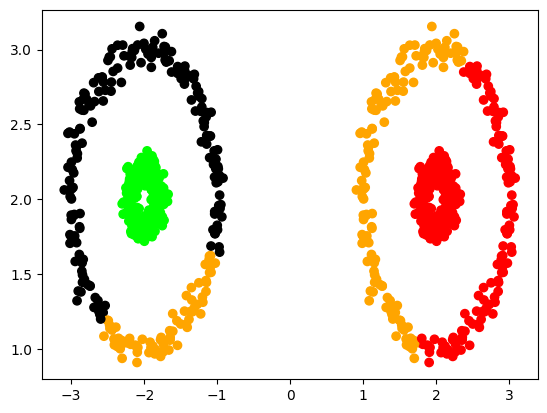

In [6]:
# Should find a way to init the fucking centers!
kernel_kmeans = TSKernelKMeans(n_clusters=K, n_init=10, kernel='precomputed').fit(kernel_matrix)
acc, pur, nmi, ari = evaluator.evaluate_model(y, kernel_kmeans.labels_)
evaluator.print_evaluation()
plt.scatter(X[:, 0], X[:, 1], c=kernel_kmeans.labels_, cmap=ListedColormap(colors))
plt.show()

### Kernel kMeans++

Executing Kernel k-Means++ Initialization
Iter: 0 Cl L: 634.0765
Iter: 1 Cl L: 622.4067
Iter: 2 Cl L: 608.5848
Iter: 3 Cl L: 596.0343
Finished in Iter: 4 Cl L: 596.0213
Executing Kernel k-Means++ Initialization
Iter: 0 Cl L: 638.8877
Iter: 1 Cl L: 632.0103
Iter: 2 Cl L: 623.3745
Iter: 3 Cl L: 611.0117
Iter: 4 Cl L: 596.2791
Finished in Iter: 5 Cl L: 595.9198
Executing Kernel k-Means++ Initialization
Iter: 0 Cl L: 622.4819
Iter: 1 Cl L: 598.8282
Iter: 2 Cl L: 595.7055
Iter: 3 Cl L: 595.6324
Iter: 4 Cl L: 595.6106
Finished in Iter: 5 Cl L: 595.5953
Executing Kernel k-Means++ Initialization
Iter: 0 Cl L: 623.9640
Iter: 1 Cl L: 600.9453
Finished in Iter: 2 Cl L: 595.9128
Executing Kernel k-Means++ Initialization
Iter: 0 Cl L: 649.2615
Iter: 1 Cl L: 644.7937
Iter: 2 Cl L: 638.1876
Iter: 3 Cl L: 630.4804
Iter: 4 Cl L: 617.1784
Iter: 5 Cl L: 594.2948
Iter: 6 Cl L: 590.6963
Iter: 7 Cl L: 573.8253
Iter: 8 Cl L: 549.8658
Iter: 9 Cl L: 530.3196
Iter: 10 Cl L: 528.0289
Finished in Iter: 11 Cl L: 5

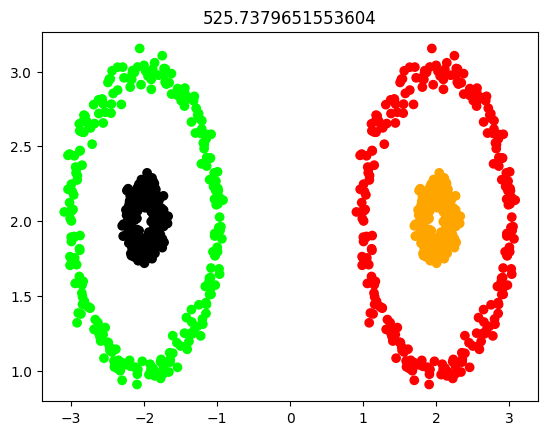

In [7]:
kernelKMeans =  KernelKMeans()
min_total_error, best_partition = kernelKMeans.kernel_kmeans(X, K, kernel_matrix, n_init=10, method='k-means++')
plt.scatter(X[:, 0], X[:, 1], c=best_partition, cmap=ListedColormap(colors))
plt.title(min_total_error)
plt.show()

### Global Kernel kMeans

2
Executing Global Initialization
Iter: 0 Cl L: 792.6691
Iter: 1 Cl L: 710.5316
Finished in Iter: 2 Cl L: 700.3405
Executing Global Initialization
Iter: 0 Cl L: 841.8871
Iter: 1 Cl L: 832.9430
Iter: 2 Cl L: 829.6184
Iter: 3 Cl L: 827.1850
Iter: 4 Cl L: 825.0017
Iter: 5 Cl L: 823.3063
Iter: 6 Cl L: 821.7327
Iter: 7 Cl L: 820.3003
Iter: 8 Cl L: 818.2375
Iter: 9 Cl L: 816.9408
Iter: 10 Cl L: 815.3213
Iter: 11 Cl L: 813.7674
Iter: 12 Cl L: 811.7513
Iter: 13 Cl L: 808.7081
Finished in Iter: 14 Cl L: 803.6188
Executing Global Initialization
Iter: 0 Cl L: 780.0219
Iter: 1 Cl L: 702.8937
Finished in Iter: 2 Cl L: 700.3405
Executing Global Initialization
Iter: 0 Cl L: 840.5093
Iter: 1 Cl L: 832.1006
Iter: 2 Cl L: 828.9585
Iter: 3 Cl L: 826.9322
Iter: 4 Cl L: 825.0720
Iter: 5 Cl L: 823.5692
Iter: 6 Cl L: 822.3606
Iter: 7 Cl L: 821.1287
Iter: 8 Cl L: 819.6169
Iter: 9 Cl L: 818.2313
Iter: 10 Cl L: 816.6156
Iter: 11 Cl L: 814.8951
Iter: 12 Cl L: 813.2710
Iter: 13 Cl L: 811.5003
Iter: 14 Cl L: 808.1

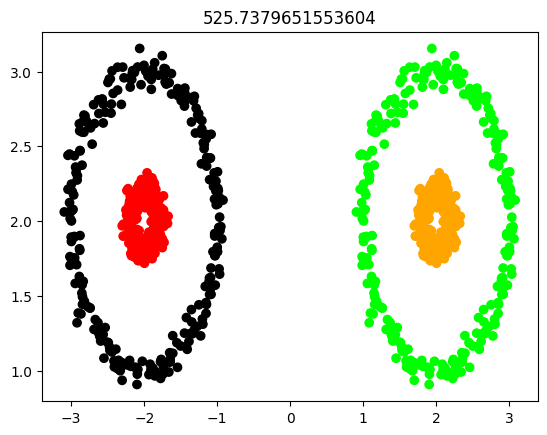

In [8]:
globalKernelKMeans =  GlobalKernelKMeans()
min_total_error, best_partition, _, _ = globalKernelKMeans.global_kernel_kmeans(K, X, kernel_matrix)
plt.scatter(X[:, 0], X[:, 1], c=best_partition, cmap=ListedColormap(colors))
plt.title(min_total_error)
plt.show()